In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

file_path = 'gaussiannaivebayes.csv'
data = pd.read_csv(file_path)

data.head()

,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay,Shipment Mode
0,650,6.50,0.01,0.00,0.01,-87,Air_All
1,240,2.40,0.01,0.00,0.00,-156,Air_All
2,6,405.06,67.51,0.25,0.65,0,Ground_Sea
3,600,870.00,1.45,0.01,1.39,0,Ground_Sea
4,5498,54.98,0.01,0.00,0.09,-65,Air_All


In [3]:

label_encoder = LabelEncoder()
data['Shipment Mode'] = label_encoder.fit_transform(data['Shipment Mode'])
data.head()


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay,Shipment Mode
0,650,6.50,0.01,0.00,0.01,-87,0
1,240,2.40,0.01,0.00,0.00,-156,0
2,6,405.06,67.51,0.25,0.65,0,1
3,600,870.00,1.45,0.01,1.39,0,1
4,5498,54.98,0.01,0.00,0.09,-65,0


In [4]:
numerical_columns = ['Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 
                     'LineItemInsurance', 'Delay']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data.head()

,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay,Shipment Mode
0,-0.543846,-0.587119,-0.804978,-0.708298,-0.578465,-1.030158,0
1,-0.561222,-0.587145,-0.804978,-0.708298,-0.578504,-1.915960,0
2,-0.571139,-0.584669,2.512826,-0.157092,-0.575994,0.086722,1
3,-0.545965,-0.581811,-0.734198,-0.686250,-0.573136,0.086722,1
4,-0.338388,-0.586821,-0.804978,-0.708298,-0.578156,-0.747729,0


In [5]:

X = data.drop(columns='Shipment Mode')  
y = data['Shipment Mode'] 

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy}")

AdaBoost Accuracy: 0.7214506172839507


AdaBoost Accuracy: 0.7214506172839507
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       852
           1       0.67      0.36      0.47       444

    accuracy                           0.72      1296
   macro avg       0.70      0.64      0.64      1296
weighted avg       0.71      0.72      0.69      1296



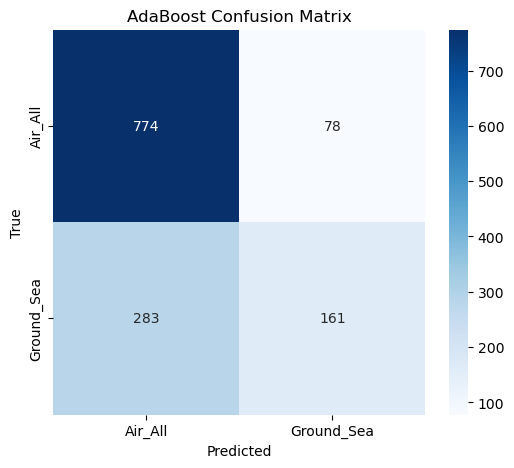

In [13]:

accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("AdaBoost Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
print("\nSample of training data:")
display(y_train.head())

print("\nSample of testing data:")
display(y_test.head())


Sample of training data:


2981    0
6044    0
293     1
6340    0
445     1
Name: Shipment Mode, dtype: int64


Sample of testing data:


2095    0
2415    0
3045    1
351     1
5495    0
Name: Shipment Mode, dtype: int64

In [12]:
print("\nSample of training data:")
display(X_train.head())

print("\nSample of testing data:")
display(X_test.head())


Sample of training data:


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
2981,2.313496,3.430516,-0.333604,-0.002754,2.015754,-0.888944
6044,-0.566265,-0.531366,2.880980,0.658694,-0.529383,0.086722
293,-0.570121,-0.575045,2.422877,-0.179140,-0.563597,-0.221383
6340,-0.570333,-0.587158,-0.804978,-0.708298,-0.578504,0.086722
445,-0.566350,-0.584733,-0.642282,-0.465767,-0.576611,0.086722



Sample of testing data:


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
2095,-0.564273,-0.585796,-0.740588,-0.664201,-0.577075,-0.182869
2415,-0.570884,-0.579783,4.109304,1.496527,-0.569429,0.086722
3045,0.276206,0.553913,-0.349333,-0.620105,0.604106,0.086722
351,-0.570249,-0.582592,0.546720,-0.201188,-0.575569,0.086722
5495,-0.555373,-0.380328,3.569117,1.253996,-0.364140,2.333322
